# Prediting heart disease using ML

In this notebook we'll be looking into using different machine learning and data science tools to build a model capable of predicting whether a patient has heart disease ot not.

Steps:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentaion

## 1. Problem Definition

> Given clinical parameters about a patient can we predict or not whether they have heart disease?

## 2. Data

The original data came from Cleavland data from the UCI Machine Learning Repository.

There's also a version available in kaggle.

## 3. Evaluation

> We should at least reach 95% accuracy at predicting whether or not a patient has heart disease during the poc.

## 4. Features

This is where we should understand more about each of the features of the data.

### Heart Disease Dataset - Data Dictionary

| **Feature**                      | **Description**                                      |
|-----------------------------------|------------------------------------------------------|
| **Age**                           | Patient's age in years                              |
| **Sex**                           | `1 = Male`, `0 = Female`                           |
| **Chest Pain Type**               | Type of chest pain experienced (4 categories)      |
| **Resting Blood Pressure**        | Blood pressure in mm Hg at rest                    |
| **Serum Cholesterol**             | Cholesterol level in mg/dL                         |
| **Fasting Blood Sugar**           | `1 = > 120 mg/dL`, `0 = ≤ 120 mg/dL`               |
| **Resting ECG Results**           | `0 = Normal`, `1 = ST-T wave abnormality`, `2 = LVH` |
| **Max Heart Rate Achieved**       | Maximum heart rate reached during exercise         |
| **Exercise-Induced Angina**       | `1 = Yes`, `0 = No`                                |
| **Oldpeak**                       | ST depression induced by exercise relative to rest |
| **Slope of ST Segment**           | Slope of peak exercise ST segment                  |
| **Major Vessels (0-3)**           | Number of major vessels colored by fluoroscopy     |
| **Thalassemia (Thal)**            | `0 = Normal`, `1 = Fixed Defect`, `2 = Reversible Defect` |

## Preparing the tools

I'll be using Pandas, NumPy and MAtplotlib for data analysis and manipulation.

In [232]:
# Tools importationsss

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay, roc_curve

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Exploratory Data Analysis (EDA)

The goal is to find out more about the data and become an expert on the dataset we working with.

1. What questions are we tryin to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how to deal with it?
4. Where are the outliers and what should we do with them?
5. How can we add, change and remove features to get more out of our data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Let's find out how many of each class there are
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

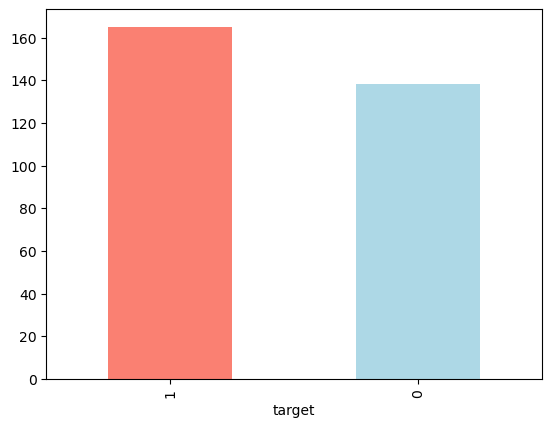

In [5]:
df["target"].value_counts().plot(kind='bar', color=["salmon", "lightblue"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# No missing??
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequesncy according to Sex

In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
# Heatmap comparisons
def plot_conf_mat(conf_mat, fmt,x_label, y_label, figsize, cmap):
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.heatmap(conf_mat,
                    annot=True,
                    fmt=fmt,
                    cbar=True,
                    cmap=cmap)
    if x_label and y_label:
        plt.xlabel(x_label)
        plt.ylabel(y_label)

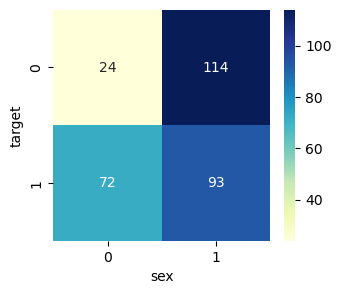

In [11]:
# Compare target to sex
sex_to_target = pd.crosstab(df.target, df.sex)
plot_conf_mat(sex_to_target, "d", None, None, (3.5, 3), "YlGnBu")

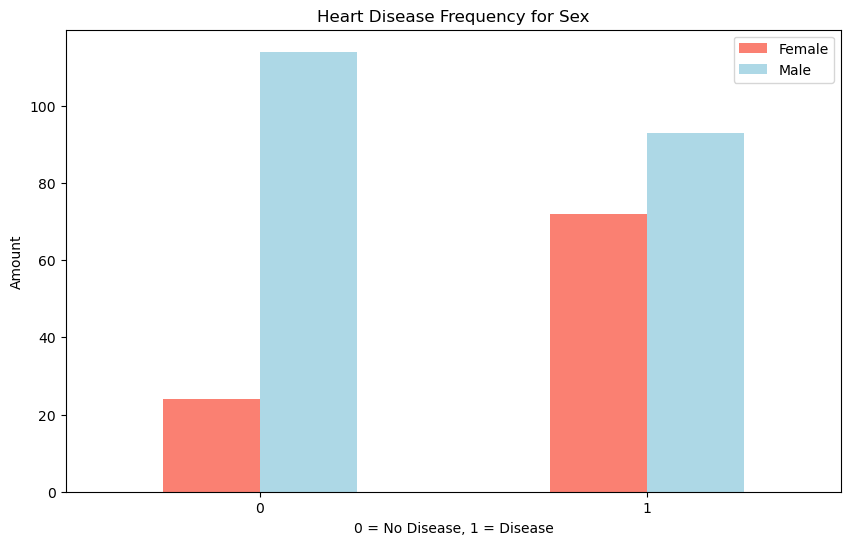

In [12]:
# Create a plot of the crosstab
sex_to_target.plot(
    kind='bar',
    figsize=(10, 6),
    color=["salmon", "lightblue"]
)
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease 

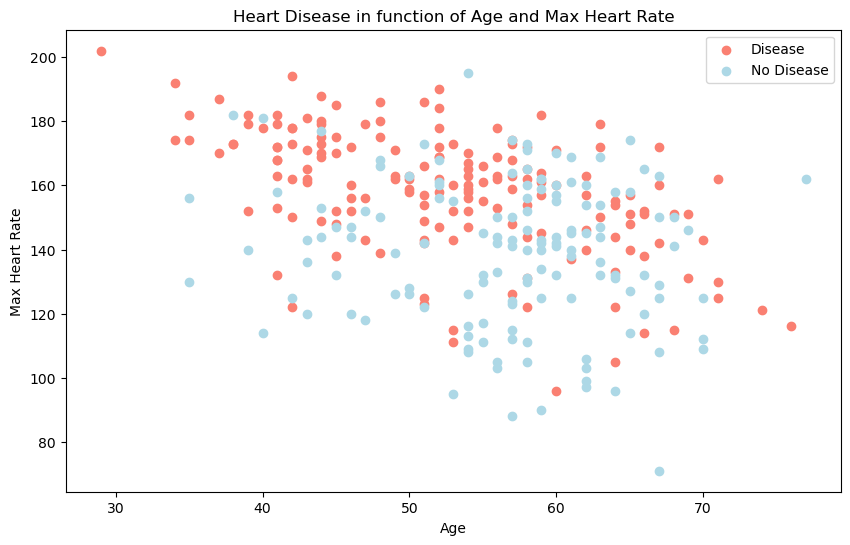

In [13]:
# Create figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(
    df.age[df.target == 1],
    df.thalach[df.target == 1],
    c = "salmon"
)

# Scatter with negative examples
plt.scatter(
    df.age[df.target == 0],
    df.thalach[df.target == 0],
    c = "lightblue"
);

# Add  some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(["Disease", "No Disease"]);

<Axes: ylabel='Frequency'>

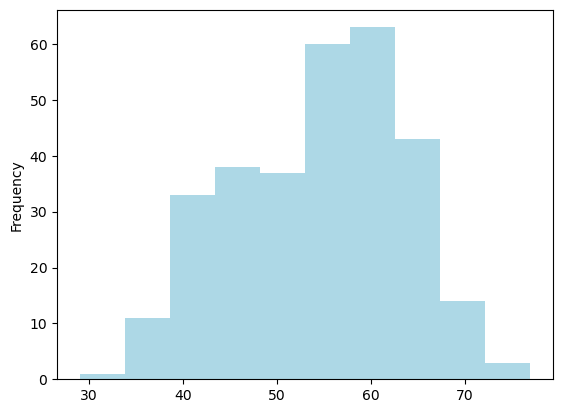

In [14]:
# Check Age distribution with a Histogram
df.age.plot(kind="hist", color="lightblue")

### Heart Disease Frequency per Chest Pain Type

In [15]:
target_to_cp = pd.crosstab(df.cp, df.target)
target_to_cp

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


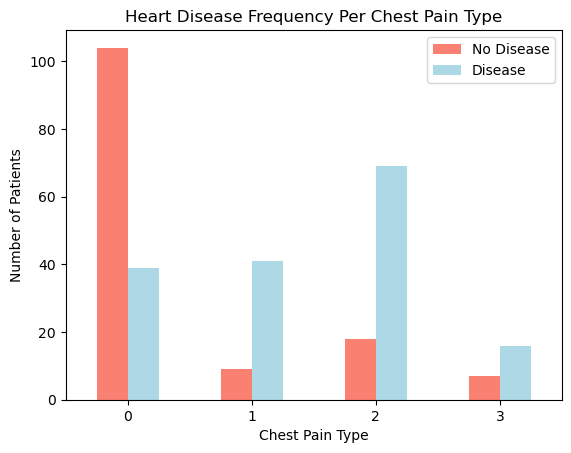

In [16]:
target_to_cp.plot(kind="bar",
                  color=["salmon", "lightblue"])
# Add  some helpful info
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Correlation Matrix

In [18]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


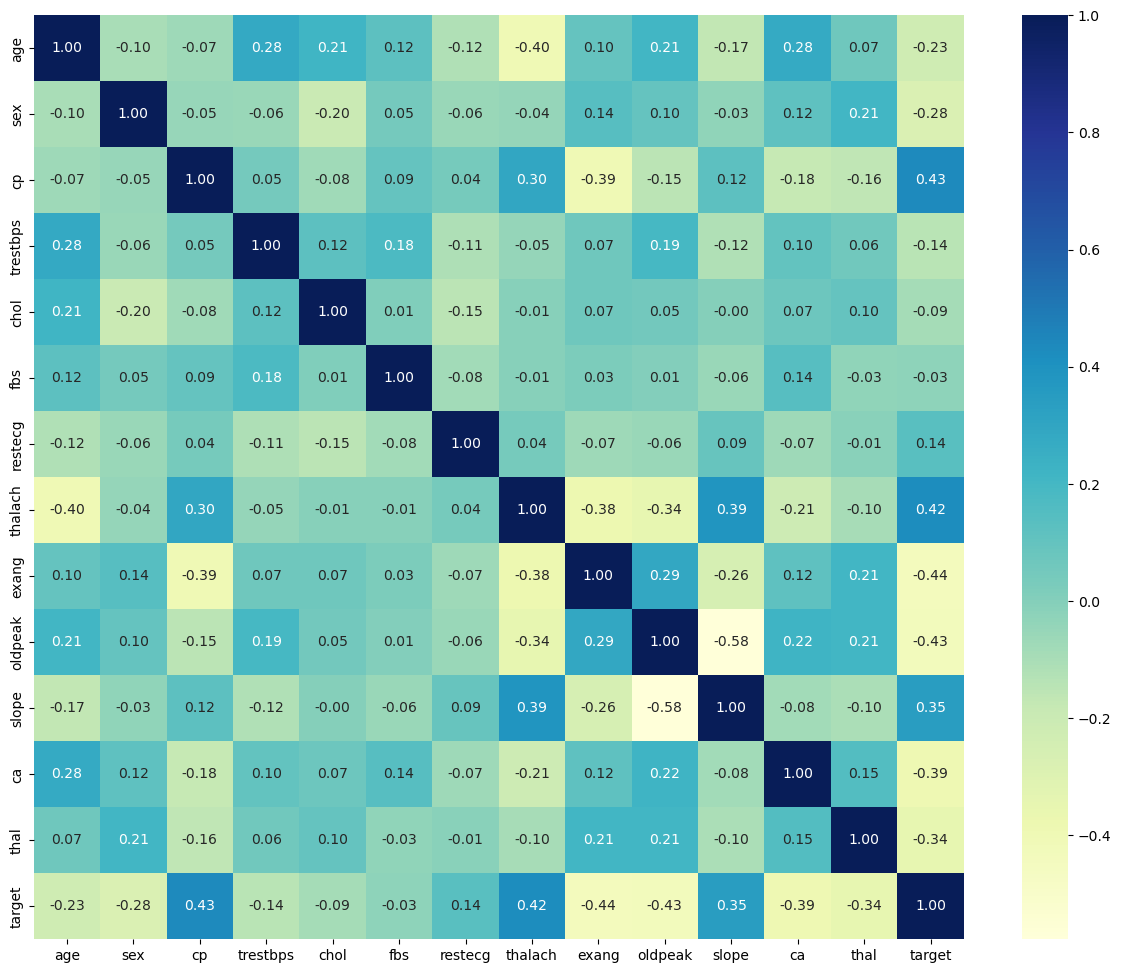

In [19]:
# Let's Make this matrix prettier
plot_conf_mat(df.corr(), ".2f",None, None, (15, 12), "YlGnBu")

## 5. Modeling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# SPlit the data to features X and labels y
X = df.drop("target", axis=1)
y = df["target"]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [23]:
# Split into training and test split*

np.random.seed(1337)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

Now I've got the data all setup and split, it's about time to build the model.

I'll train it to find pattern (fit) the training set.

then test it to use these patterns on test set.

I'll try this 3 machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [124]:
# Put models in dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Create a function to fit and score models

def fit_and_score (models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given dictionary of machine learning models.
    """
    # Set Seed
    np.random.seed(1337)

    #Make a dict for scores
    scores = {}

    # Loop through model
    for name, model in models.items():
        # Fit the models
        model.fit(X_train, y_train)
        # Evalute model and store scores in the dict
        scores[name] = model.score(X_test, y_test)
    return scores

In [125]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

D:\Program Files\anaconda\envs\env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6229508196721312,
 'Random Forest': 0.8032786885245902}

### Model Comparison

In [126]:
compare_models = pd.DataFrame.from_dict(model_scores, orient='index', columns=["accuracy"])
compare_models

,accuracy
Logistic Regression,0.868852
KNN,0.622951
Random Forest,0.803279


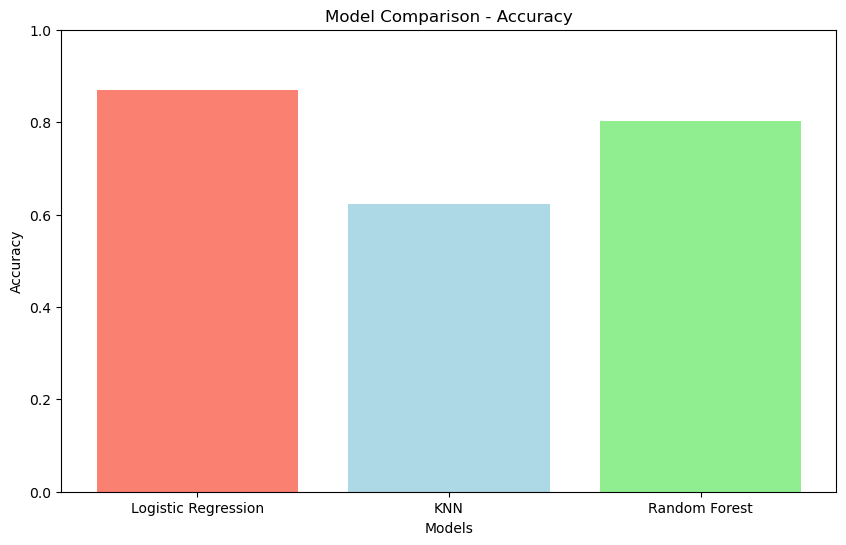

In [127]:
# Extract model names and accuracy values
model_names = compare_models.index
accuracy_values = compare_models["accuracy"]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color=['salmon', 'lightblue', 'lightgreen'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.ylim(0, 1)  # Ensure the y-axis is between 0 and 1 for accuracy

# Show the plot
plt.show()

Now that I have my baseline model, I’ll focus on improving and fine-tuning it through the following steps:

- Hyperparameter tuning
- Feature importance analysis
- Confusion matrix evaluation
- Cross-validation
- Precision
- Recall
- F1 score
- Classification report
- ROC curve
- Area under the curve (AUC)
### Hyperparameter tuning

In [128]:
# Lets tune KNN

train_scores =[]
test_scores = []

# Create a list of different values for n-neighbors

neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for n in neighbors:
    knn.set_params(n_neighbors=n)
    #Fit the algorithm
    knn.fit(X_train, y_train)

    # Evaluate the data
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [129]:
train_scores

[1.0,
 0.8305785123966942,
 0.8016528925619835,
 0.7768595041322314,
 0.78099173553719,
 0.768595041322314,
 0.743801652892562,
 0.743801652892562,
 0.7148760330578512,
 0.7066115702479339,
 0.71900826446281,
 0.7148760330578512,
 0.7024793388429752,
 0.6859504132231405,
 0.6942148760330579,
 0.6983471074380165,
 0.6859504132231405,
 0.6942148760330579,
 0.6818181818181818,
 0.7024793388429752]

In [130]:
test_scores

[0.5737704918032787,
 0.47540983606557374,
 0.6721311475409836,
 0.6721311475409836,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853]

Maximum KNN score on the test data: 72.13%


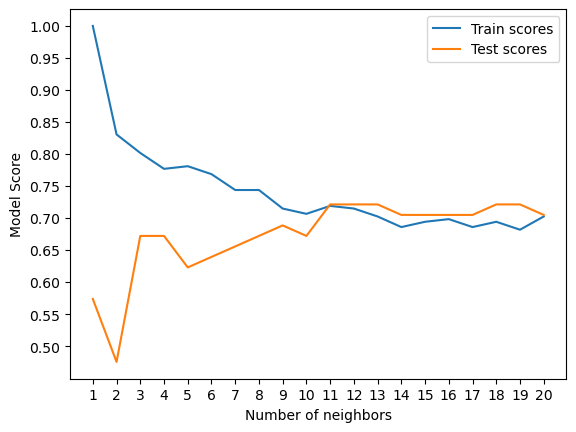

In [131]:
plt.plot(neighbors, train_scores, label="Train scores")
plt.plot(neighbors, test_scores, label="Test scores")
plt.xticks(np.arange(1, 21, 1))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%")

after further analysis, it appears that the KNN model must be ruled out. Since even after tuning, it doesnt compete with the other two models.

### Hyperparameter tuning with RandomizedSearchCV
I'll try to tune both LogisticRegression and RandomForestClassifier to see which one of them is better suited for our problem.

In [265]:
# Create a hyperparam grid for Logistic regression
logistical_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["lbfgs"],
}

# Create a hyperparam grid for Random Forest
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}


In [270]:
# Tune LogisticRegression

np.random.seed(1337)

# Setup random hyperparam search for LogiticalRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(max_iter=5000),
                                param_distributions=logistical_grid,
                                cv=5,
                                n_iter=20)

# Fit random hyperparam search for LogiticalRegression
rs_log_reg.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['lbfgs']})

In [271]:
rs_log_reg.best_params_

{'solver': 'lbfgs', 'C': np.float64(0.23357214690901212)}

In [272]:
rs_log_reg.score(X_test, y_test)

0.819672131147541

In [121]:
# Tune Random Forest

np.random.seed(1337)

# Setup random hyperparam search for Random Forest
rs_rf_reg = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=100,
                                verbose=True)

# Fit random hyperparam search for Random Forest
rs_rf_reg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [122]:
rs_rf_reg.best_params_

{'n_estimators': np.int64(660),
 'min_samples_split': np.int64(18),
 'min_samples_leaf': np.int64(1),
 'max_depth': 3}

In [123]:
rs_rf_reg.score(X_test, y_test)

0.8688524590163934

### Tuning Hyperparameters using GridSearchCV


In [277]:
# Different Hyperparams for our logistic regression
logistical_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear", "lbfgs"],
}
np.random.seed()
# Setup random hyperparam search for LogiticalRegression
gs_log_reg = GridSearchCV(LogisticRegression(max_iter=5000),
                                param_grid=logistical_grid,
                                cv=5)

# Fit random hyperparam search for LogiticalRegression
gs_log_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'lbfgs']})

In [278]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'lbfgs'}

In [279]:
gs_log_reg.score(X_test, y_test) 

0.819672131147541

## Evaluate the tuned machine learning classifier, beyond accuracy

- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- F1-score

... use cross-validation when possible

In [230]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [231]:
y_test

96     1
142    1
80     1
67     1
188    0
      ..
140    1
258    0
269    0
85     1
153    1
Name: target, Length: 61, dtype: int64

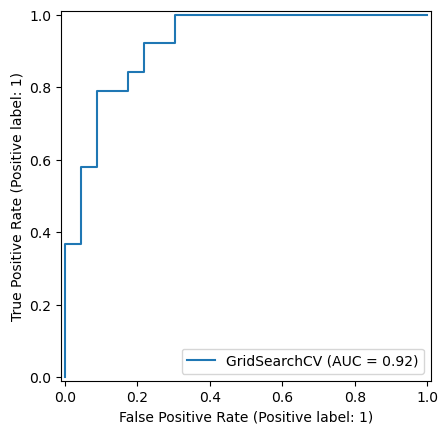

In [234]:
# Plot ROC curve and calculate the AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()

In [235]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[16  7]
 [ 1 37]]


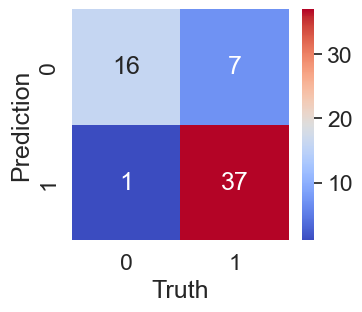

In [242]:
sns.set(font_scale=1.5)
plot_conf_mat(confusion_matrix(y_test, y_preds), "d", "Truth", "Prediction", (3.5, 3), "coolwarm")

In [280]:
# Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80        23
           1       0.84      0.97      0.90        38

    accuracy                           0.87        61
   macro avg       0.89      0.83      0.85        61
weighted avg       0.88      0.87      0.86        61



In [251]:
pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.941176,0.840909,0.868852,0.891043,0.878715
recall,0.695652,0.973684,0.868852,0.834668,0.868852
f1-score,0.800000,0.902439,0.868852,0.851220,0.863814
support,23.000000,38.000000,0.868852,61.000000,61.000000


### Calculate evaluation metrics using cross-validation

Calculate precision, recall and f1-score of our model using cross-validation `cross_val_score()`

In [252]:
# Check best hyperparams
gs_log_reg.best_params_

{'C': np.float64(117.21022975334793), 'solver': 'lbfgs'}

In [262]:
# Create new classifier with best params
clf = LogisticRegression(C=117.21022975334793, solver="lbfgs", max_iter=5000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

In [287]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.80327869, 0.8852459 , 0.81967213, 0.86666667, 0.76666667])

In [288]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.78378378, 0.90625   , 0.84375   , 0.83783784, 0.74358974])

In [289]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.87878788, 0.87878788, 0.81818182, 0.93939394, 0.87878788])

In [290]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1

array([0.82857143, 0.89230769, 0.83076923, 0.88571429, 0.80555556])

In [294]:
# Averages of all the cross validated metrics
cv_acc, cv_precision, cv_recall, cv_f1 = np.mean(cv_acc), np.mean(cv_precision), np.mean(cv_recall), np.mean(cv_f1)
cv_acc, cv_precision, cv_recall, cv_f1 

(np.float64(0.8283060109289618),
 np.float64(0.8230422730422731),
 np.float64(0.8787878787878787),
 np.float64(0.8485836385836386))

In [320]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame(
    {
        "Accuracy": cv_acc,
        "Precision": cv_precision,
        "Recall": cv_recall,
        "F1-Score": cv_f1
    },
    index=[""]
)

cv_metrics

,Accuracy,Precision,Recall,F1-Score
,0.828306,0.823042,0.878788,0.848584


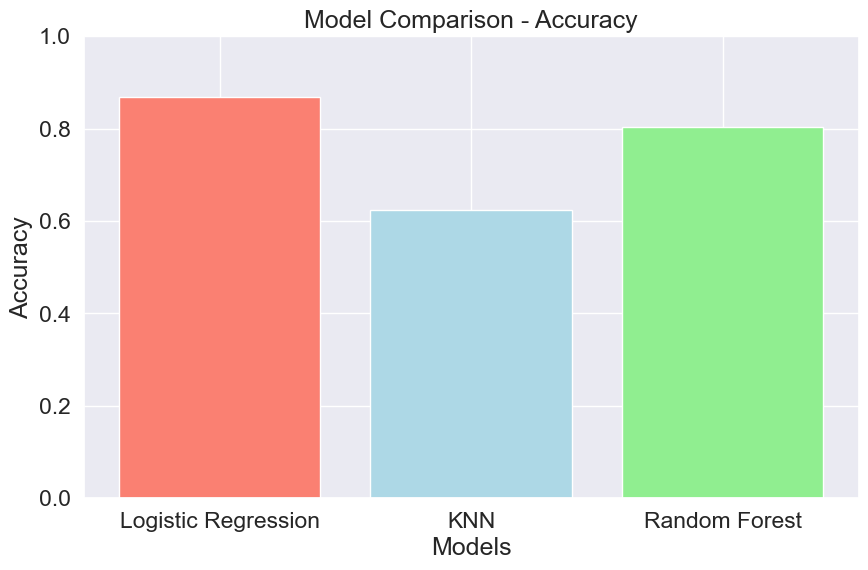

In [306]:
# Extract model names and accuracy values
model_names = compare_models.index
accuracy_values = compare_models["accuracy"]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color=['salmon', 'lightblue', 'lightgreen'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.ylim(0, 1)  # Ensure the y-axis is between 0 and 1 for accuracy

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

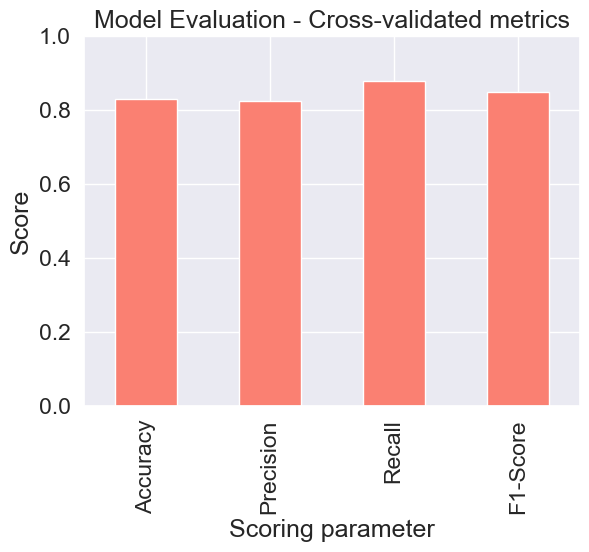

In [323]:
plt.figure(figsize=(10, 6))
cv_metrics.T.plot(kind="bar", color=['salmon', 'lightblue', 'lightgreen', 'yellow'], legend=False)
plt.xlabel('Scoring parameter')
plt.ylabel('Score')
plt.title('Model Evaluation - Cross-validated metrics')
plt.ylim(0, 1);

### Feature Importance

Another way of finding which features contributed to the outcome of the model.

Finding it is different for each model.

For LogisticRegression...

In [329]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [327]:
# Fit and instance of logistic regression
clf = LogisticRegression(C=117.21022975334793, solver="lbfgs", max_iter=5000)
clf.fit(X_train, y_train)

LogisticRegression(C=117.21022975334793, max_iter=5000)

In [328]:
# Check coef_
clf.coef_

array([[-0.00490274, -1.33425409,  0.84174648, -0.02163211, -0.00736382,
         0.51269348,  0.63694206,  0.02227834, -0.5956097 , -0.4350508 ,
         0.48752538, -0.745359  , -1.1817568 ]])

In [330]:
# MAtch Coefs of features to columns
feature_dict = dict(zip(df.columns, clf.coef_[0]))
feature_dict

{'age': np.float64(-0.004902737743993152),
 'sex': np.float64(-1.334254086914208),
 'cp': np.float64(0.8417464797076956),
 'trestbps': np.float64(-0.02163211326686122),
 'chol': np.float64(-0.007363824590800844),
 'fbs': np.float64(0.512693475281223),
 'restecg': np.float64(0.6369420560006985),
 'thalach': np.float64(0.02227833716944544),
 'exang': np.float64(-0.5956097007793631),
 'oldpeak': np.float64(-0.43505080416737885),
 'slope': np.float64(0.48752537649482997),
 'ca': np.float64(-0.7453589962197382),
 'thal': np.float64(-1.1817568010974548)}

<Axes: title={'center': 'Feature Importance'}, xlabel='Features', ylabel='Coefs'>

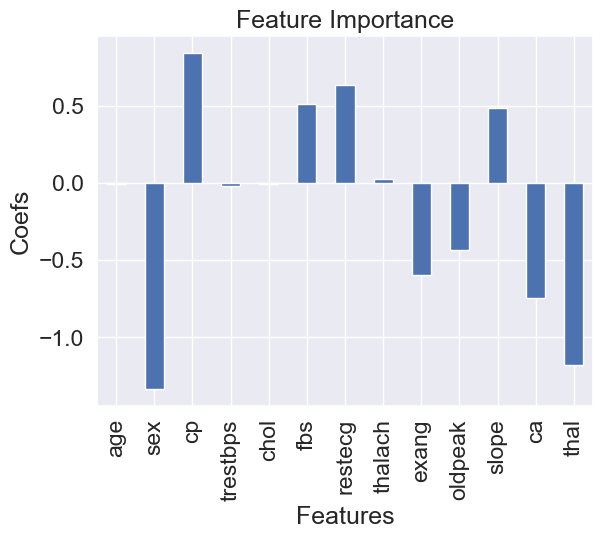

In [332]:
# Vizualise feature importance
feature_dict = pd.DataFrame(feature_dict, index=[0])
feature_dict.T.plot.bar(title="Feature Importance", xlabel="Features", ylabel="Coefs", legend=False)

## 6. Experimentation

Since I havent reach the evaluation metrics I might
- Collect mode data
- Try a better model (CatBoost, XGBoost ...)
- Improve current model beyond whai I've done so fat

else I might just export it using `pickle` or `joblist`